In [2]:
import numpy as np
import networkx as nx
import pandas as pd
from pandas import DataFrame
from tqdm import tqdm
from networkx.algorithms import average_shortest_path_length

In [3]:
def randic_index(G):
    #TODO: Finish documentation
    #TODO: Add randic algorithm to documentation
    
    """Compute the Randic index of the graph.

    Parameters
    ----------
    G : NetworkX graph

    Returns
    -------
    index: int
        

    Raises
    ------
    

    Examples
    --------
    >>> G = nx.erdos_renyi_graph(n=50, p=0.5)
    >>> print(nx.randic_index(G))
    25

    Notes
    -----
    ***Notes regarding bounds of Randic index go here***

    See Also
    --------
    
    """
    #TODO: add edge weights to graph? 
    #      Return graph with edges or just randic index?
    #      Is there a way to store the randic index in the graph?
    
    deg_dict = G.degree(G.nodes)
    index = np.sum([(1/np.sqrt(deg_dict[edge[0]]*deg_dict[edge[1]])) for edge in G.edges])
    
    return index

In [4]:
def simulate(prob_range: list, num_vert_range: list, num_sims: list) -> DataFrame:
    sample_dist = {}
    for i in tqdm(num_vert_range):
        graphs = {}    
        for j in prob_range:
            for k in range(num_sims):
                if k == 0:
                    graphs[j+1] = []
                    g = nx.erdos_renyi_graph(i,j)
                    graphs[j+1].append(g)
                else:
                    g = nx.erdos_renyi_graph(i,j)
                    graphs[j+1].append(g)
        
        sample_dist[i] = [np.mean([np.mean(randic_index(G)) for G in list(graphs.items())[idx][1]]) for idx,_ in enumerate(list(graphs.keys()))]
    
    return pd.DataFrame(sample_dist, index=prob_range) 

In [5]:
prob_range = [i/100 for i in range(0,101,5)]
num_vert_range = range(5,105,10)
num_sims = 1000
test = simulate(prob_range=prob_range, num_vert_range=num_vert_range, num_sims=num_sims)
test

100%|██████████| 10/10 [07:46<00:00, 46.69s/it]


,5,15,25,35,45,55,65,75,85,95
0.01,0.095243,0.973049,2.667609,5.006062,7.847559,11.054261,14.897728,18.900007,23.092518,27.583981
0.06,0.535860,4.181466,9.128067,14.388206,19.669472,24.893688,30.037173,35.166284,40.223145,45.303504
0.11,0.917268,5.703605,10.976156,16.196162,21.322759,26.357878,31.397901,36.403587,41.419756,46.421094
0.16,1.222677,6.399261,11.642536,16.744774,21.783993,26.803070,31.801711,36.810849,41.810643,46.820772
0.21,1.436156,6.806357,11.948467,16.976978,21.992933,27.002007,32.003471,37.007930,42.006868,47.016590
0.26,1.699457,7.002992,12.095433,17.113322,22.122365,27.127982,32.129001,37.135144,42.129592,47.132514
0.31,1.829695,7.146574,12.192441,17.200264,22.202863,27.205401,32.209244,37.212616,42.211426,47.214839
0.36,1.992973,7.229661,12.255870,17.260621,22.266618,27.268179,32.270124,37.271176,42.271076,47.273668
0.41,2.095224,7.291989,12.303157,17.308527,22.312877,27.312928,32.313002,37.314573,42.315996,47.316644
0.46,2.183210,7.325398,12.339584,17.344924,22.344310,27.347566,32.351297,37.349903,42.350253,47.349634


<AxesSubplot:>

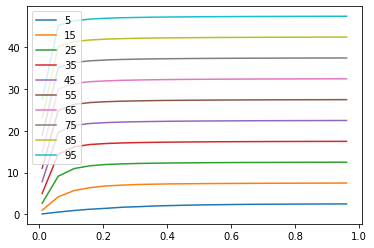

In [8]:
test.plot()

In [7]:
test.to_pickle('test.pkl')